In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ridge import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
sns.set_color_codes()

In [3]:
np.random.seed(0)
def f(x):
    w = np.ones(x.shape)
    w2 = np.zeros(x.shape)
    w2[0] = 1
    w /= np.linalg.norm(w)
    return np.dot(x, w)**3 + np.dot(x, w2)**2+1
X = np.random.uniform(size = (int(1e3),10))

fX = np.array([f(x) for x in X])
noise = 0.1*np.random.randn(*fX.shape)
noise_norm = np.linalg.norm(noise)
fX += noise

In [4]:
np.random.seed(5)
U0_vec = [orth(np.random.randn(10,2)) for i in range(10)]

In [5]:
res_norm_gauss_newton_vec = []
for i, U0 in enumerate(U0_vec):
    U, c, hist = grassmann_gauss_newton(U0, X, fX, degree = 3, history = True, disp = False, gtol = 0, ftol = 1e-12)
    res_norm_gauss_newton = [np.linalg.norm(r) for r in hist['residual']]
    res_norm_gauss_newton_vec.append(res_norm_gauss_newton)
    print "finished iter", i

finished iter 0
finished iter 1
finished iter 2
finished iter 3
finished iter 4
finished iter 5
finished iter 6
finished iter 7
finished iter 8
finished iter 9


In [6]:
from ridge_paul import *
degree = 3
maxiter = 50
tol = 1e-10
res_norm_alternating_vec = []
for i, U0 in enumerate(U0_vec):
    U, hist = RidgeAlternating(X, fX.reshape(-1,1), U0, degree, maxiter, tol**2, history = True, disp = False)
    res_norm = [np.linalg.norm(r) for r in hist['residual']]
    res_norm_alternating_vec.append(res_norm)
    print "finished iter", i

finished iter 0
finished iter 1
finished iter 2
finished iter 3
finished iter 4
finished iter 5
finished iter 6
finished iter 7
finished iter 8
finished iter 9


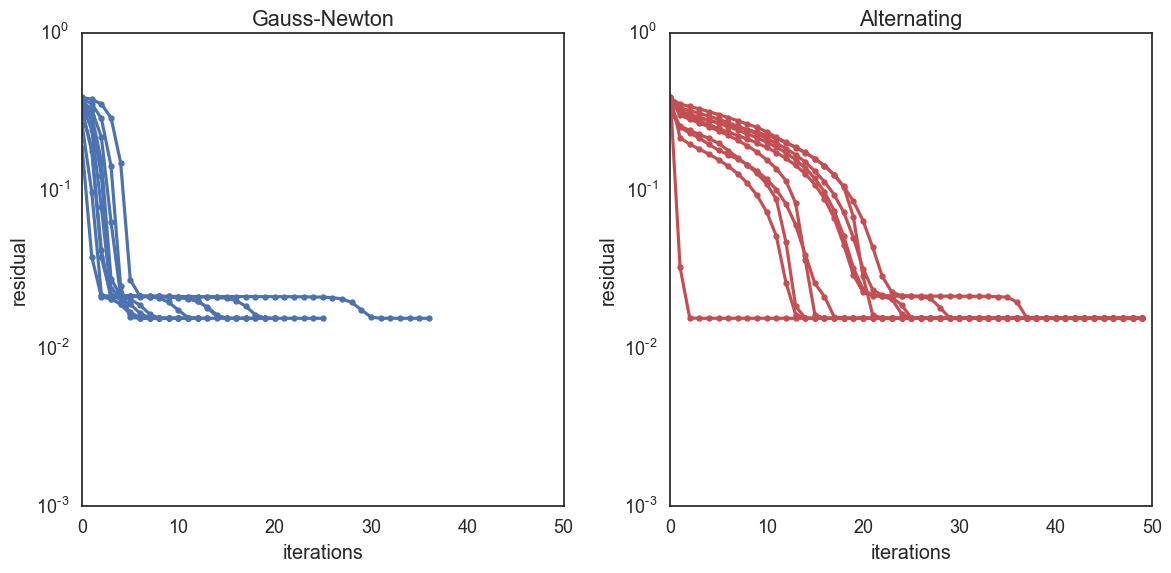

In [9]:
fig, axes = plt.subplots(1,2, figsize = (12, 6))
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1)
    ax.set_xlim(0, 50)
    ax.set_xlabel('iterations')
    ax.set_ylabel('residual')
    
for res_norm in res_norm_gauss_newton_vec:
    axes[0].plot(res_norm/np.linalg.norm(fX), 'b.-')
axes[0].set_title('Gauss-Newton')

for res_norm in res_norm_alternating_vec:
    axes[1].plot(res_norm/np.linalg.norm(fX), 'r.-')
axes[1].set_title('Alternating')

fig.tight_layout()
